# Exploring the ULEZ Impact on London House Prices

Name: Christine Langston
Module: CASA0006 - Data Science for Spatial Systems, UCL
Date: April 22, 2024 

Outline of Paper: 
1. Introduction 
2. Background and Literature Review
    - three relevant studies
3. Research question: What is the impact of the ULEZ on London House Prices? 
4. Presentation of Data
5. Methodology
6. Results
7. Discussion 
8. Conclusion 

## Introduction
Cities are making more climate change policies, which is overall a good sign of progress. However, we should be critical of all policies and question 1) their effectiveness and 2) if the policy is creating unexpected consequences. For example, climate policies have the potential to both positively and negatively impact the economy and quality of life for residents. 

Living in London, I am interested in exploring the impact of the Ultra Low Emission Zone (ULEZ) on real estate values in the city. 

Motivation: Anytime the government draws a boundary line and uses it to create spatial policy, it creates unintended externalities. The ULEZ was created and announced in April 2019  to "reduce air pollutant emissions from road transport" (Ma, et al, 2021). The ULEZ has been one of many policies that London has implemented with the aim to improve air quality in the capital. .

There have been numerous academic studies to determine if the ULEZ and its relative, the LEZ have been effective as policy treatments for reducing urban emissions and improving air quality. Researchers have found there is a downward trend of air pollution over time and they did not find a significant impact by the ULEZ (Ma, et al, 2021)

Is it possible that the ULEZ has impacted real estate values and home prices in recent sales? Spatial policies have the ability to make the areas they effect in the city either more or less desirable to live in. This study will determine if house prices, as a proxy for desirability and demand of houses, have increased inside the zone. 

## Background and Literature Review

Academics in the social sciences and public health often evaluate if a policy has been an effective intervention and made the difference it was created to do. We can evaluate if a policy is effective by using causal inference techniques. 

For Spatial Policies, we can consider the region and geography that the policy effects as the 'treatment' group, and the rest of the geography as a control group. This research question is inspired by a paper that compared house prices within school catchment districts of New York City (Rischard, et al., 2021), and that is how they framed their research. There are specific geographic boundaries that divide houses and streets into the districts, and given that schools fall on a ranking of desirability, the ability to live within the catchment area matters and house prices are impacted. 

This paper found that there is a significant difference in house prices across several districts. They found one area in New York City where houses on the desirable side of the district line were on averge roughly 20% more than the houses on the less desirable side using Geographical Regression Discontinuity Design (GeoRDD). Of course, housing stock is hetergenious and one must acknowledge the differences and spatial variations of housing type and quality, no to mention community ammenities such as schools and high streets, that impact prices. 

A key part of these causal inference techniques are that the geographic boundary can be seen as arbitrary and assume (and prove) that the properties on either side are similar.



Terms to use: exogenous factor, forcing variable, etc  

-- perhaps define more RDD (from the Rischard paper)


In [ ]:
#Import libraries here 

In [3]:
import pandas as pd # version 2.1.4
import os
import glob



Create a dataset of house prices by type and year

In [69]:

def my_csv(filepath):
    year = filepath[-8:-4]
    names = ["postcode", year + "_detached", year +"_semi-det", year + "_terraced", 
          year + "_Flat/mais", year + "_average" ]
   # print(names)
    #names = ['A', 'B', 'C', 'D', 'E', 'F']
    d = pd.read_csv(filepath, names = names, skiprows = 6, usecols = [0, 1, 3, 5, 7, 9])
    return d.set_index('postcode')

house_prices = pd.concat(map(my_csv, glob.glob('../Data/*.csv')), axis = 1 , join='inner')


In [70]:
house_prices.head()

2018_detached  2018_semi-det  2018_terraced  2018_Flat/mais  \
postcode                                                                
BR1 1                 0         450000         465000          295808   
BR1 2           1090677         638707         478136          391204   
BR1 3           1041147         589639         497904          326397   
BR1 4            663392         539686         375085          293281   
BR1 5            430000         469413         344459          262583   

          2018_average  2019_detached  2019_semi-det  2019_terraced  \
postcode                                                              
BR1 1           307357              0         221000         300000   
BR1 2           723402         987903         596300         501136   
BR1 3           460131         999060         629654         496768   
BR1 4           423306         677300         565671         370906   
BR1 5           357380         558167         465810         343291   

          2019_Flat/mais  2019_average  ...  2017_detached  2017_semi-det  \
postcode                                ...                                 
BR1 1             294426        291476  ...              0              0   
BR1 2             378691        681879  ...        1052802         619908   
BR1 3             338610        458369  ...         917167         675558   
BR1 4             291038        411219  ...         744050         610648   
BR1 5             234045        360938  ...         616249         452169   

          2017_terraced  2017_Flat/mais  2017_average  2016_detached  \
postcode                                                               
BR1 1            439167          309829        318452         631000   
BR1 2            478006          399909        744905        1003584   
BR1 3            533230          359968        447487        1102900   
BR1 4            377477          317416        421878         767836   
BR1 5            356583          248496        370622         595000   

          2016_semi-det  2016_terraced  2016_Flat/mais  2016_average  
postcode                                                              
BR1 1            482500         393500          334878        347531  
BR1 2            555532         459537          405571        652608  
BR1 3            658481         582116          366506        460979  
BR1 4            573581         371503          278928        412248  
BR1 5            447940         341450          261088        365612  

[5 rows x 85 columns]

In [ ]:
# Datasets needed: 
-- House prices per year (2019 +/- 3 years)
-- Post code sector geographies
-- ULEZ Zone geography 

Pseudo Code Steps: 
- Download the data -- get the geofiles
- Load in the data
- create a dataset of house prices per year (currently they are in each file)
- Determine which Post code sectors are in the 'in group' and which are in the 'out group' based on geography 
- filter the house price per post code by the in and out group 

- Exploratory basic stats: 
    - what is the general trend of house price averages over the years? 
    Panel regression: 
    - what if we divide it up by in group / out group? 
        - what about by house type? 
        - clustering by geography? 
- Look into difference in differences


In [ ]:
sales_23 = read_csv 

Presentation of Dataset

- Dataset 1: Average House Sale Price, aggregated up to post code sector, for all of Greater London. From HM Land Registry Open Data (https://landregistry.data.gov.uk/). This data is available in yearly reports, so I downloaded each year and compiled them together by joining on postcode. More information is provided here by the UK Government: https://www.gov.uk/guidance/about-the-price-paid-data



Dataset of per year sales
- keep the sectioning out by type but can ignore the quantity / count

In [26]:
#for file in os.listdir(directory):
 #   filename = os.fsdecode(file)
    
    # Create an empty DataFrame to store merged data
merged_data = pd.DataFrame()

# Merge CSV files
for filename in ls_filenames:
    print(filename)
    df = pd.read_csv(filename, skiprows = 5)
    merged_data = pd.concat([merged_data, df], axis = 0)

# Save the merged DataFrame to a new CSV file
#merged_data.to_csv('merged_data_pandas.csv', index=False)

../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2018.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2019.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2009.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2021.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2020.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2008.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2022.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2023.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2012.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2007.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2013.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2011.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2010.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2014.csv
../Data/avgPrice-county-GREATER_LONDON-by-pcSector-any-2015.csv
../Data/avgPrice-county-GREATER_LONDON-b

In [68]:
directory = '../Data/'

ls_filenames = []
# iterate over files in that directory
for filename in os.scandir(directory):
    if filename.is_file():
        ls_filenames.append(filename.path)

## Bibliography


Ma, L., Graham, D.J., Stettler, M. E. J. (2021) Has the ultra low emission zone in London improved air quality? Environmental Research Letters, 16(12), p.124001.

Percoco, M. (2015) Environmental effects of the London Congestion Charge: A regression discontinuity approach. In Working Paper.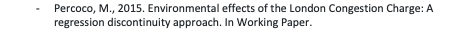

Rischard, M., Branson, Z., Miratrix, L. & Bornn, L. (2021) Do
School Districts Affect NYC House Prices? Identifying Border Differences Using a Bayesian
Nonparametric Approach to Geographic Regression Discontinuity Designs, Journal of the
American Statistical Association, 116:534, 619-631, DOI: 10.1080/01621459.2020.1817749